In [70]:
import math
import pandas as pd
from keras import models, layers, optimizers, regularizers
import numpy as np
import random
from sklearn import model_selection, preprocessing
import tensorflow as tf
from tqdm import tqdm
import matplotlib.pyplot as plt

In [71]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

In [72]:
datos = pd.DataFrame(data.data, columns=data.feature_names)
ys = pd.DataFrame(data.target,columns=['Tipo_Cancer'])

In [73]:
datos['tipoCancer']=ys

In [74]:
datos.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,tipoCancer
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [75]:
n_test= int(math.ceil(len(datos)*0.3))
random.seed(42)
test_ixs=random.sample(list(range(len(datos))),n_test)
train_ixs=[ix for ix in range(len(datos)) if ix not in test_ixs]
train=datos.iloc[train_ixs,:]
test=datos.iloc[test_ixs,:]
print(len(train),len(test))

398 171


In [76]:
data=datos
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(datos.drop('tipoCancer', axis=1), ys, test_size=0.3, random_state=123)


In [77]:
X_train.shape, X_test.shape

((398, 30), (171, 30))

In [78]:
y_train.shape, y_test.shape

((398, 1), (171, 1))

In [79]:
from sklearn.preprocessing import normalize
features = X_train.columns
X_train = normalize(X_train)
X_test = normalize(X_test)


In [80]:
hidden_units = 10  # numero de neuronas en la capa oculta
activation = 'relu'  # tipo de activacion
l2_reg = 0.01   # regularizacion cuanta mas alta es la penalizacion

learning_rate = 0.01  # factor de aprendizaje
epochs = 7             # numero de iteraciones para entrenamiento
batch_size = 16       # tamaño de la muestra


In [81]:
model = models.Sequential() # create a sequential model
model.add(layers.Dense(input_dim=len(features),
                       units=hidden_units,
                       activation=activation)) # add a hidden layer with 10 units to the model

c:\Users\CL160369868\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [82]:
model.add(layers.Dense(input_dim=hidden_units,
                       units=1,
                       activation='sigmoid')) #output layer


In [83]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(learning_rate=learning_rate),
              metrics=['accuracy']) #compile model

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6381 - loss: 0.6687
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6396 - loss: 0.6528
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6338 - loss: 0.6489
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6178 - loss: 0.6475
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6181 - loss: 0.6370
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6336 - loss: 0.6080
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6251 - loss: 0.5886
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6685 - loss: 0.5391
Epoch 9/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6960 - loss: 0.5105
Epoch 10/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8517 - loss: 0.4783
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8497 - loss: 0.4362
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7715 - loss: 0.4826 
Train accuracy

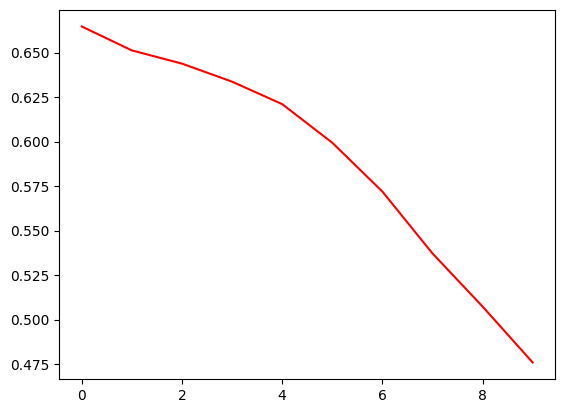

In [84]:
history = model.fit(X_train, y_train, epochs=10, batch_size=batch_size) #Train the parameters

train_acc=model.evaluate(X_train, y_train, batch_size=32)[1] #Evaluate the model
test_acc=model.evaluate(X_test, y_test, batch_size=32)[1] #
print('Train accuracy: %s'% train_acc)
print('Test accuracy: %s'% test_acc)

losses = history.history['loss']
plt.plot(range(len(losses)), losses, 'r')
plt.show()

Epoch 1/10


c:\Users\CL160369868\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6359 - loss: 0.6610
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5806 - loss: 0.6738
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6465 - loss: 0.6103
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7443 - loss: 0.5800
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8240 - loss: 0.5027
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8136 - loss: 0.4255
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8939 - loss: 0.3111
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8680 - loss: 0.3185
Epoch 9/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8916 - loss: 0.2763
Epoch 10/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8950 - loss: 0.2761
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9106 - loss: 0.2274
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8990 - loss: 0.3109
Training accuracy: 0.88442

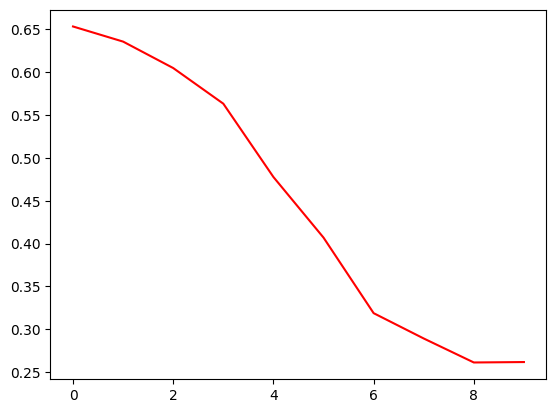

In [85]:
hidden_units=10 # nodos de capas ocultas iniciales

# create model
model = models.Sequential()

# aprimera capa oculta de 10 nodos
model.add(layers.Dense(input_dim=len(features),
                       units=hidden_units,
                       activation=activation))
#segunda capa oculta de 10 nodos
model.add(layers.Dense(input_dim=hidden_units,
                       units=hidden_units,
                       activation=activation))

# ultima capa oculta de 1 nodo
model.add(layers.Dense(input_dim=hidden_units,
                       units=1,
                       activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(learning_rate=learning_rate),
              metrics=['accuracy'])

#traint the parameters
history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=batch_size)

#evalute the accuracy
train_acc=model.evaluate(X_train, y_train, batch_size=32)[1]
test_acc=model.evaluate(X_test, y_test, batch_size=32)[1]
print('Training accuracy: %s' % train_acc)
print('Test accuracy: %s' % test_acc)

losses = history.history['loss']
plt.plot(range(len(losses)), losses, 'r')
plt.show()


Epoch 1/10


c:\Users\CL160369868\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5985 - loss: 0.6600
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6242 - loss: 0.6369
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6466 - loss: 0.5976 
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7736 - loss: 0.4895
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8486 - loss: 0.3675
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8954 - loss: 0.2961
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9235 - loss: 0.2289
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8906 - loss: 0.2672
Epoch 9/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8857 - loss: 0.2685  
Epoch 10/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9138 - loss: 0.2248
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9266 - loss: 0.2060
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8984 - loss: 0.2154
Training accuracy: 0.90

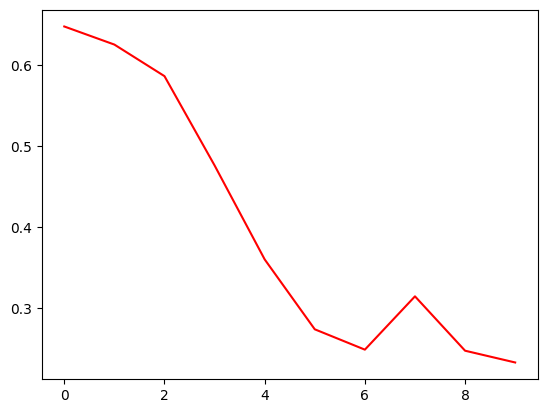

In [86]:
hidden_units=20 # nodos de capas ocultas iniciales

# create model
model = models.Sequential()

# aprimera capa oculta de 10 nodos
model.add(layers.Dense(input_dim=len(features),
                       units=hidden_units,
                       activation=activation))
#segunda capa oculta de 10 nodos
model.add(layers.Dense(input_dim=hidden_units,
                       units=hidden_units,
                       activation=activation))

# ultima capa oculta de 1 nodo
model.add(layers.Dense(input_dim=hidden_units,
                       units=1,
                       activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(learning_rate=learning_rate),
              metrics=['accuracy'])

#traint the parameters
history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=batch_size)

#evalute the accuracy
train_acc=model.evaluate(X_train, y_train, batch_size=32)[1]
test_acc=model.evaluate(X_test, y_test, batch_size=32)[1]
print('Training accuracy: %s' % train_acc)
print('Test accuracy: %s' % test_acc)

losses = history.history['loss']
plt.plot(range(len(losses)), losses, 'r')
plt.show()

In [87]:
def train_and_evaluate(model, x_train, y_train, x_test, y_test,n=20):
    train_accs = []
    test_accs = []
    with tqdm(total=n) as progress_bar:
        for i in range(n):
            model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size,verbose=False)
            train_accs.append(model.evaluate(x_train, y_train, batch_size=32,verbose=False)[1])
            test_accs.append(model.evaluate(x_test, y_test, batch_size=32,verbose=False)[1])
            progress_bar.update(1)
    print('Average train accuracy: %s', np.average(train_accs))
    print('Average test accuracy: %s', np.average(test_accs))
    return train_accs, test_accs



In [88]:
 _, __=train_and_evaluate(model,X_train,y_train,X_test,y_test)

100%|██████████| 20/20 [00:12<00:00,  1.61it/s]

Average train accuracy: %s 0.9250000059604645
Average test accuracy: %s 0.9362573087215423


In [89]:
predicciones=model.predict(X_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


In [90]:
 _, __=train_and_evaluate(model,X_train,y_train,X_test,y_test,n=30)

100%|██████████| 30/30 [00:18<00:00,  1.62it/s]

Average train accuracy: %s 0.9377721925576528
Average test accuracy: %s 0.9612085779507955


In [91]:
 _, __=train_and_evaluate(model,X_train,y_train,X_test,y_test,n=50)

100%|██████████| 50/50 [00:31<00:00,  1.58it/s]

Average train accuracy: %s 0.9492964828014374
Average test accuracy: %s 0.970760246515274


In [92]:
predicciones=model.predict(X_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [93]:
from sklearn.metrics import accuracy_score
accuracy_score(predicciones>0.5, y_test)

0.9707602339181286

In [94]:
from sklearn.datasets import load_wine
wine = load_wine()

In [95]:
vinos=pd.DataFrame(wine.data, columns=wine.feature_names)


In [96]:
vinos.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [97]:
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [98]:
X_train, X_test, y_train, y_test = train_test_split(vinos, wine.target, test_size=0.3, random_state=0)

In [99]:
features=X_train.columns
X_train=normalize(X_train)
X_test=normalize(X_test)

In [100]:
hidden_units = 30  # numero de neuronas en la capa oculta
activation = 'relu'  # tipo de activacion
l2_reg = 0.01   # regularizacion cuanta mas alta es la penalizacion

learning_rate = 0.01  # factor de aprendizaje
epochs = 7             # numero de iteraciones para entrenamiento
batch_size = 16       # tamaño de la muestra


Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.3523 - loss: 0.5746
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3935 - loss: 0.1931
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4080 - loss: 0.2830
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3486 - loss: 0.2678
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4420 - loss: 0.2614  
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3624 - loss: 0.1455
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4300 - loss: 0.1470
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4389 - loss: -0.1163  
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4265 - loss: -0.0868
Epoch 10/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4002 - loss: 0.0454
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4143 - loss: -0.13266
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4279 - loss: 0.3505
Training accuracy: 0.3951613

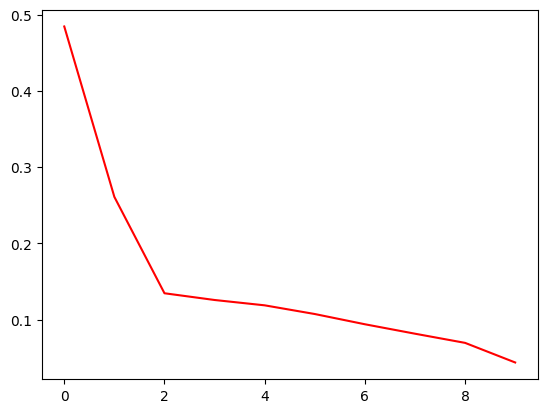

In [103]:
#hidden_units=20 # nodos de capas ocultas iniciales

# create model
model = models.Sequential()

# aprimera capa oculta de 10 nodos
model.add(layers.Dense(input_dim=len(features),
                       units=hidden_units,
                       activation='relu'))
#segunda capa oculta de 10 nodos
model.add(layers.Dense(input_dim=hidden_units,
                       units=hidden_units,
                       activation=activation))

# ultima capa oculta de 1 nodo
model.add(layers.Dense(input_dim=hidden_units,
                       units=1,
                       activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(learning_rate=learning_rate),
              metrics=['accuracy'])

#traint the parameters
history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=batch_size)

#evalute the accuracy
train_acc=model.evaluate(X_train, y_train, batch_size=32)[1]
test_acc=model.evaluate(X_test, y_test, batch_size=32)[1]
print('Training accuracy: %s' % train_acc)
print('Test accuracy: %s' % test_acc)

losses = history.history['loss']
plt.plot(range(len(losses)), losses, 'r')
plt.show()

In [102]:
vinos.shape

(178, 13)